In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [3]:
df = get_data('BLUE.jpeg')
df.iloc[:,2:].drop_duplicates()
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [4]:
im = Image.open('BLUE.jpeg') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('BlueS.png')

In [5]:
df = get_data('BlueS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

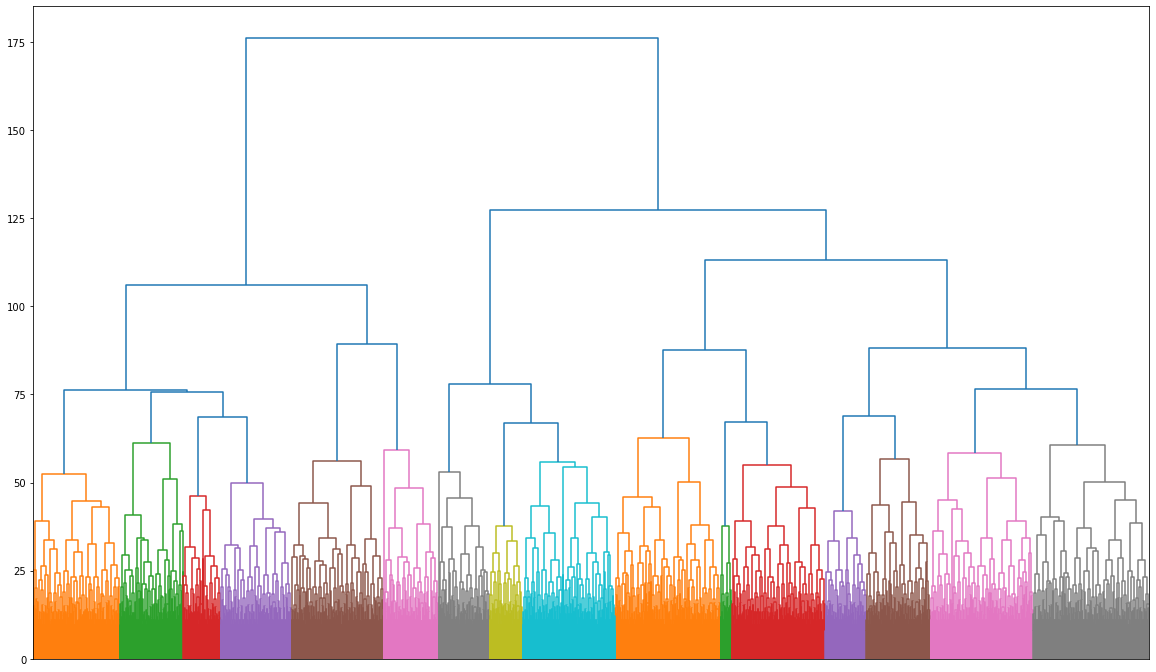

In [6]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 65)
plt.show()
fig.savefig('Blue_Dendrogram.png')

In [7]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('BlueS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [8]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#548ccc (84, 140, 204) (34.28%)',
 '#fcd46c (252, 212, 108) (13.62%)',
 '#140c0c (20, 12, 12) (13.55%)',
 '#d4949c (212, 148, 156) (10.99%)',
 '#dc9cac (220, 156, 172) (10.14%)',
 '#e4b454 (228, 180, 84) (5.18%)',
 '#9c6c74 (156, 108, 116) (2.96%)',
 '#6c94ac (108, 148, 172) (2.36%)',
 '#643414 (100, 52, 20) (2.09%)',
 '#7c5444 (124, 84, 68) (1.80%)',
 '#74acb4 (116, 172, 180) (1.11%)',
 '#4c4c4c (76, 76, 76) (0.83%)',
 '#a47424 (164, 116, 36) (0.46%)',
 '#dcdcd4 (220, 220, 212) (0.31%)',
 '#a42c2c (164, 44, 44) (0.29%)',
 '#cc6474 (204, 100, 116) (0.02%)']

/var/folders/md/8vpfc7rx2bs_wh3nc9st1xrr0000gp/T/ipykernel_83412/2463182770.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


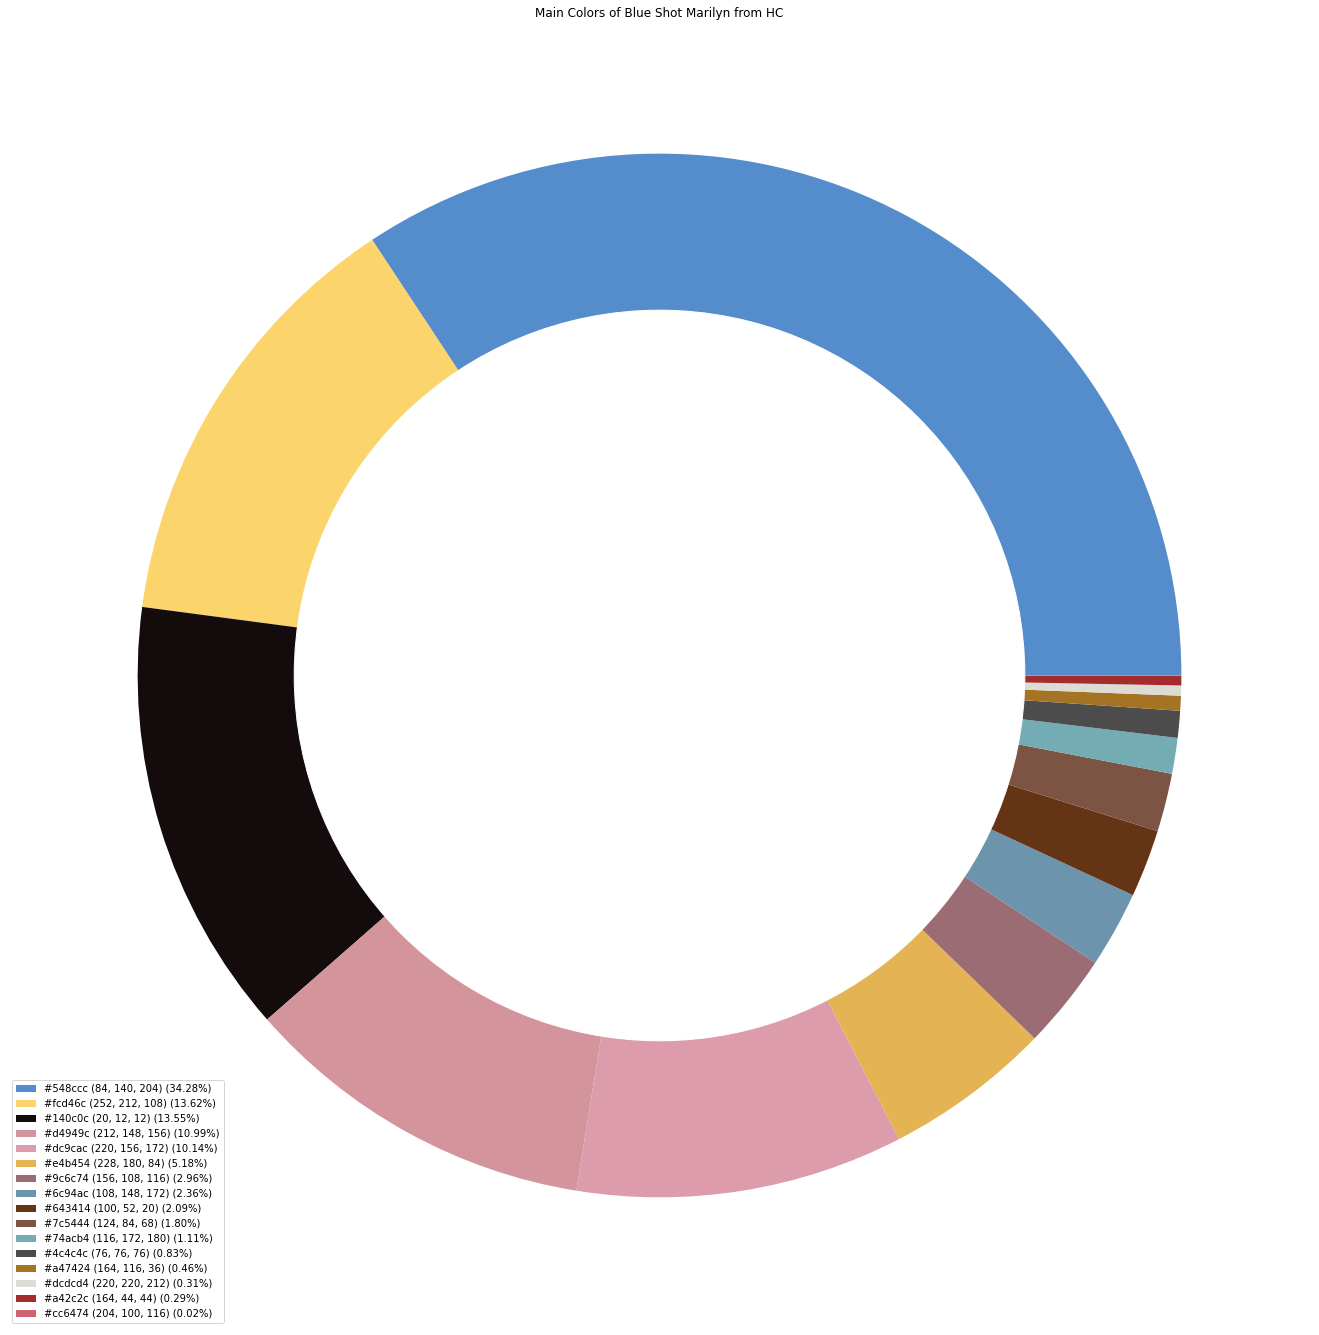

In [9]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Blue Shot Marilyn from HC')
plt.show()
fig.savefig('Blue_HC_Donut.jpg')

In [10]:
def inspect(Im,cluster,background = (255,255,255)):
    """View all the pixels in a specific cluster derived from HC"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open(Im)
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = background
    return im    

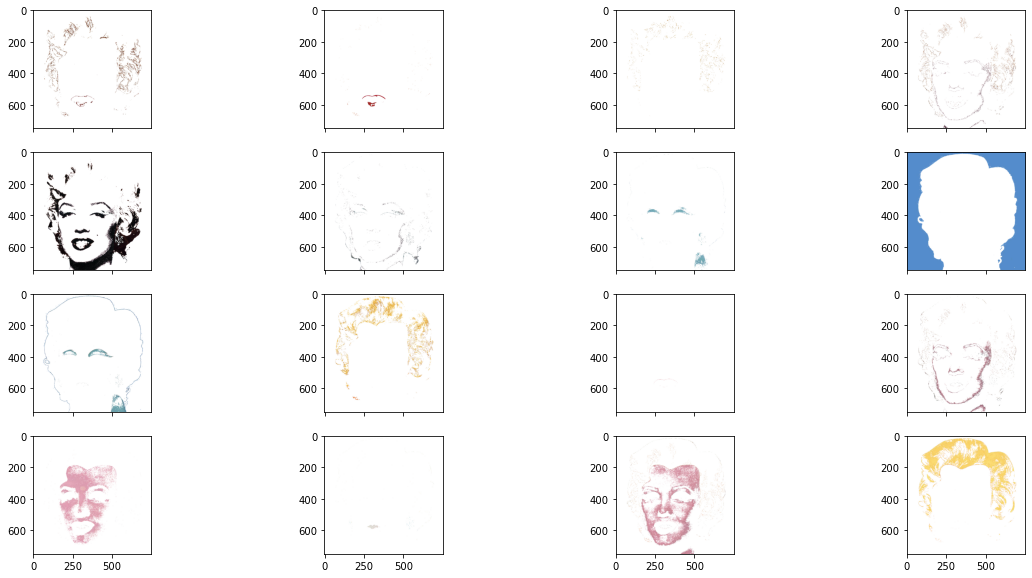

In [12]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('BlueS.png',1)))
ax[0][1].imshow(np.asarray(inspect('BlueS.png',2)))
ax[0][2].imshow(np.asarray(inspect('BlueS.png',3)))
ax[0][3].imshow(np.asarray(inspect('BlueS.png',4)))
ax[1][0].imshow(np.asarray(inspect('BlueS.png',5)))
ax[1][1].imshow(np.asarray(inspect('BlueS.png',6)))
ax[1][2].imshow(np.asarray(inspect('BlueS.png',7)))
ax[1][3].imshow(np.asarray(inspect('BlueS.png',8)))
ax[2][0].imshow(np.asarray(inspect('BlueS.png',9)))
ax[2][1].imshow(np.asarray(inspect('BlueS.png',10)))
ax[2][2].imshow(np.asarray(inspect('BlueS.png',11)))
ax[2][3].imshow(np.asarray(inspect('BlueS.png',12)))
ax[3][0].imshow(np.asarray(inspect('BlueS.png',13)))
ax[3][1].imshow(np.asarray(inspect('BlueS.png',14)))
ax[3][2].imshow(np.asarray(inspect('BlueS.png',15)))
ax[3][3].imshow(np.asarray(inspect('BlueS.png',16)))
fig.savefig('Blue_HC_Clust.jpg')

In [13]:
df = get_data('BlueS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

In [14]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#548ccc (84, 140, 204) (34.55%)',
 '#fcd46c (252, 212, 108) (10.98%)',
 '#dc9cac (220, 156, 172) (9.76%)',
 '#d494a4 (212, 148, 164) (9.19%)',
 '#0c0c0c (12, 12, 12) (8.55%)',
 '#ecbc5c (236, 188, 92) (4.91%)',
 '#241c1c (36, 28, 28) (3.93%)',
 '#b47c8c (180, 124, 140) (3.40%)',
 '#74a4ac (116, 164, 172) (3.01%)',
 '#84646c (132, 100, 108) (2.14%)',
 '#543c44 (84, 60, 68) (1.96%)',
 '#cc9c4c (204, 156, 76) (1.95%)',
 '#7c4424 (124, 68, 36) (1.62%)',
 '#54240c (84, 36, 12) (1.60%)',
 '#a4743c (164, 116, 60) (1.33%)',
 '#f4d49c (244, 212, 156) (1.13%)']

/var/folders/md/8vpfc7rx2bs_wh3nc9st1xrr0000gp/T/ipykernel_83412/1649093914.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


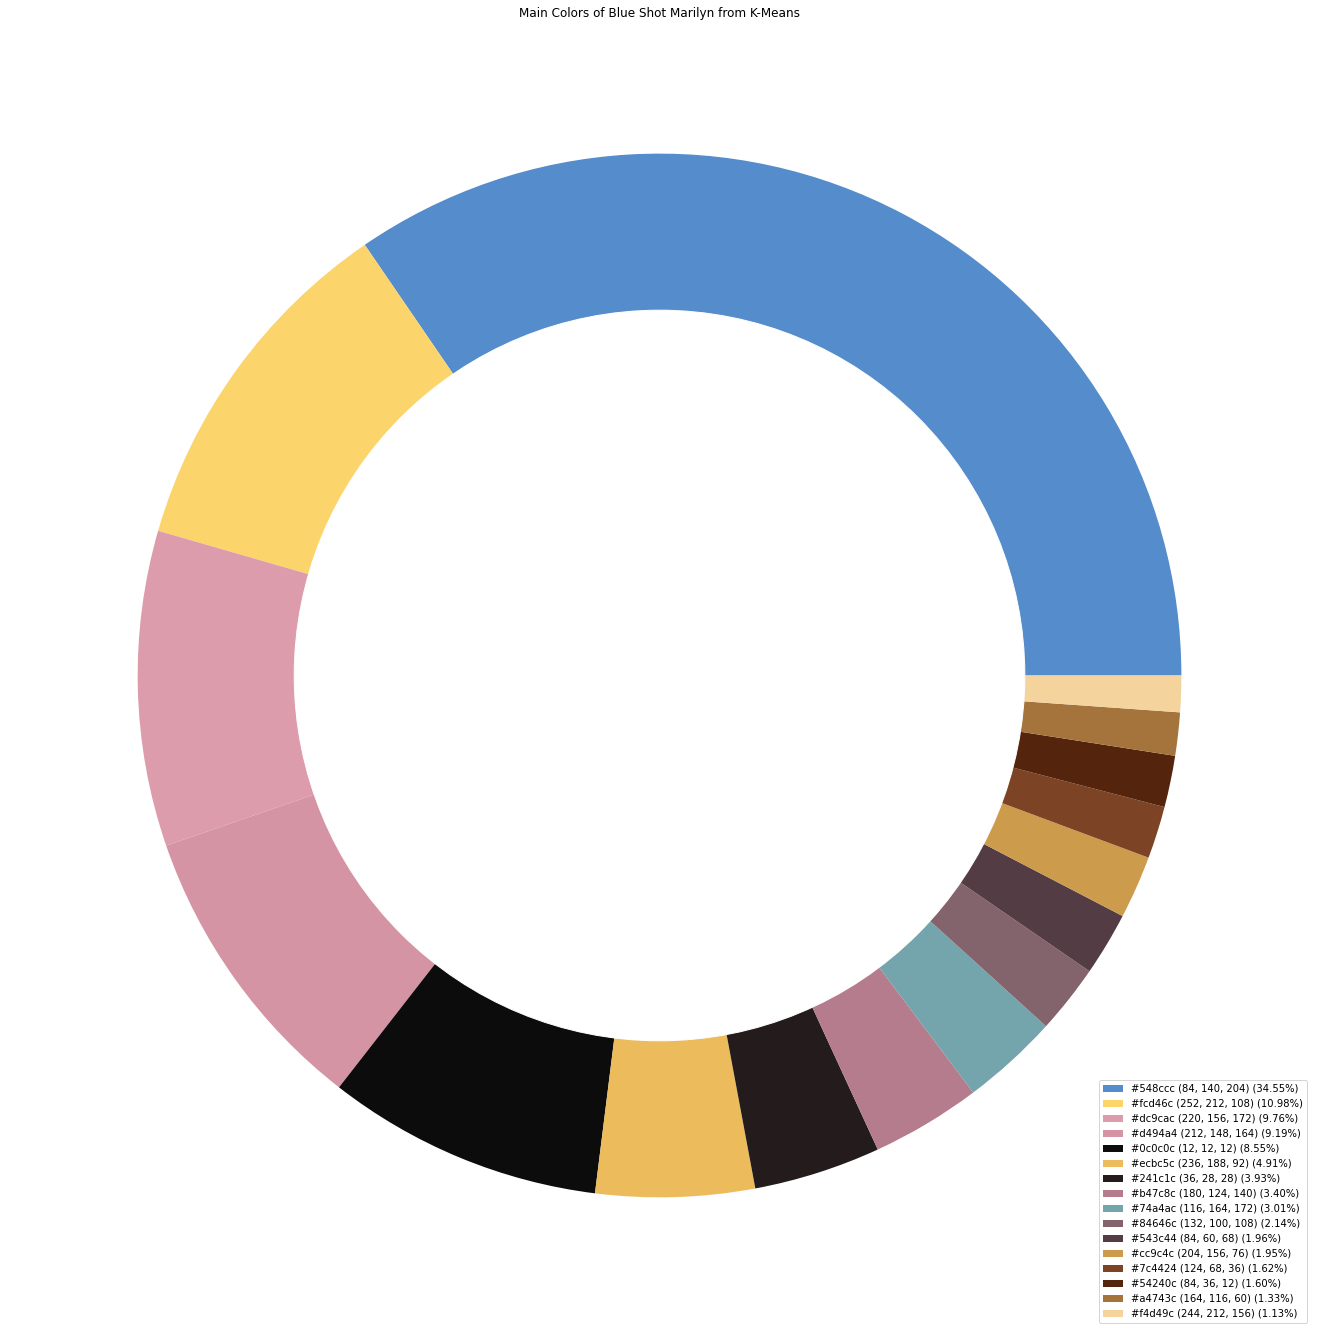

In [15]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Main Colors of Blue Shot Marilyn from K-Means')
plt.legend(patches,labels = np.array(props))
plt.show()
fig.savefig('Blue_KM_Donut.jpg')

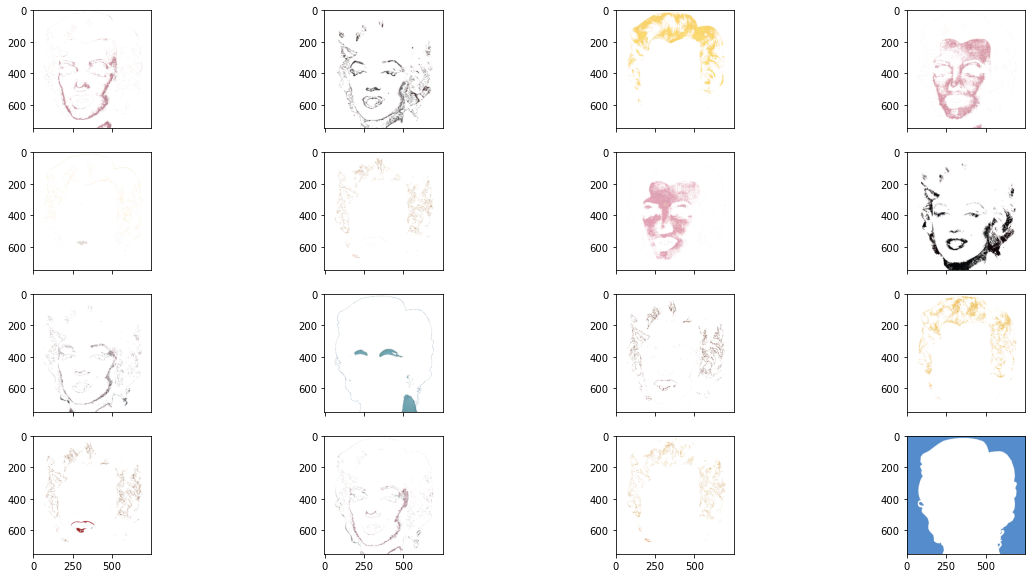

In [17]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('BlueS.png',1)))
ax[0][1].imshow(np.asarray(inspect('BlueS.png',2)))
ax[0][2].imshow(np.asarray(inspect('BlueS.png',3)))
ax[0][3].imshow(np.asarray(inspect('BlueS.png',4)))
ax[1][0].imshow(np.asarray(inspect('BlueS.png',5)))
ax[1][1].imshow(np.asarray(inspect('BlueS.png',6)))
ax[1][2].imshow(np.asarray(inspect('BlueS.png',7)))
ax[1][3].imshow(np.asarray(inspect('BlueS.png',8)))
ax[2][0].imshow(np.asarray(inspect('BlueS.png',9)))
ax[2][1].imshow(np.asarray(inspect('BlueS.png',10)))
ax[2][2].imshow(np.asarray(inspect('BlueS.png',11)))
ax[2][3].imshow(np.asarray(inspect('BlueS.png',12)))
ax[3][0].imshow(np.asarray(inspect('BlueS.png',13)))
ax[3][1].imshow(np.asarray(inspect('BlueS.png',14)))
ax[3][2].imshow(np.asarray(inspect('BlueS.png',15)))
ax[3][3].imshow(np.asarray(inspect('BlueS.png',0)))
fig.savefig('Blue_KM_Clusters.jpg')

In [18]:
df = get_data('RED.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [19]:
im = Image.open('RED.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('RedS.png')

In [20]:
df = get_data('RedS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

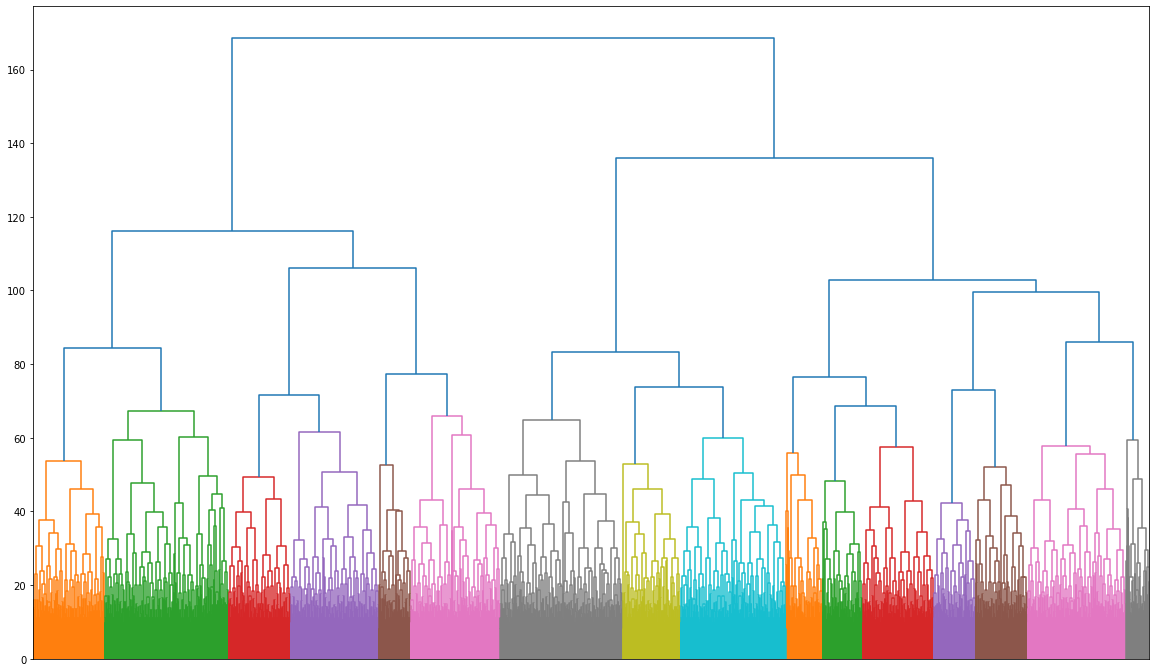

In [21]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 68)
plt.show()
fig.savefig('Red_Dendrogram.jpg')

In [22]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('RedS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [23]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#bc1404 (188, 20, 4) (28.87%)',
 '#e4cc04 (228, 204, 4) (18.98%)',
 '#040404 (4, 4, 4) (14.77%)',
 '#e4acbc (228, 172, 188) (13.75%)',
 '#ecb4cc (236, 180, 204) (9.24%)',
 '#b49c0c (180, 156, 12) (3.21%)',
 '#543c1c (84, 60, 28) (2.54%)',
 '#ac848c (172, 132, 140) (2.21%)',
 '#7c6c0c (124, 108, 12) (2.10%)',
 '#74ccac (116, 204, 172) (1.53%)',
 '#84cccc (132, 204, 204) (1.00%)',
 '#745c5c (116, 92, 92) (0.81%)',
 '#9c8c3c (156, 140, 60) (0.57%)',
 '#e4bc7c (228, 188, 124) (0.19%)',
 '#2c5444 (44, 84, 68) (0.17%)',
 '#d46c74 (212, 108, 116) (0.04%)']

/var/folders/md/8vpfc7rx2bs_wh3nc9st1xrr0000gp/T/ipykernel_83412/3308655458.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


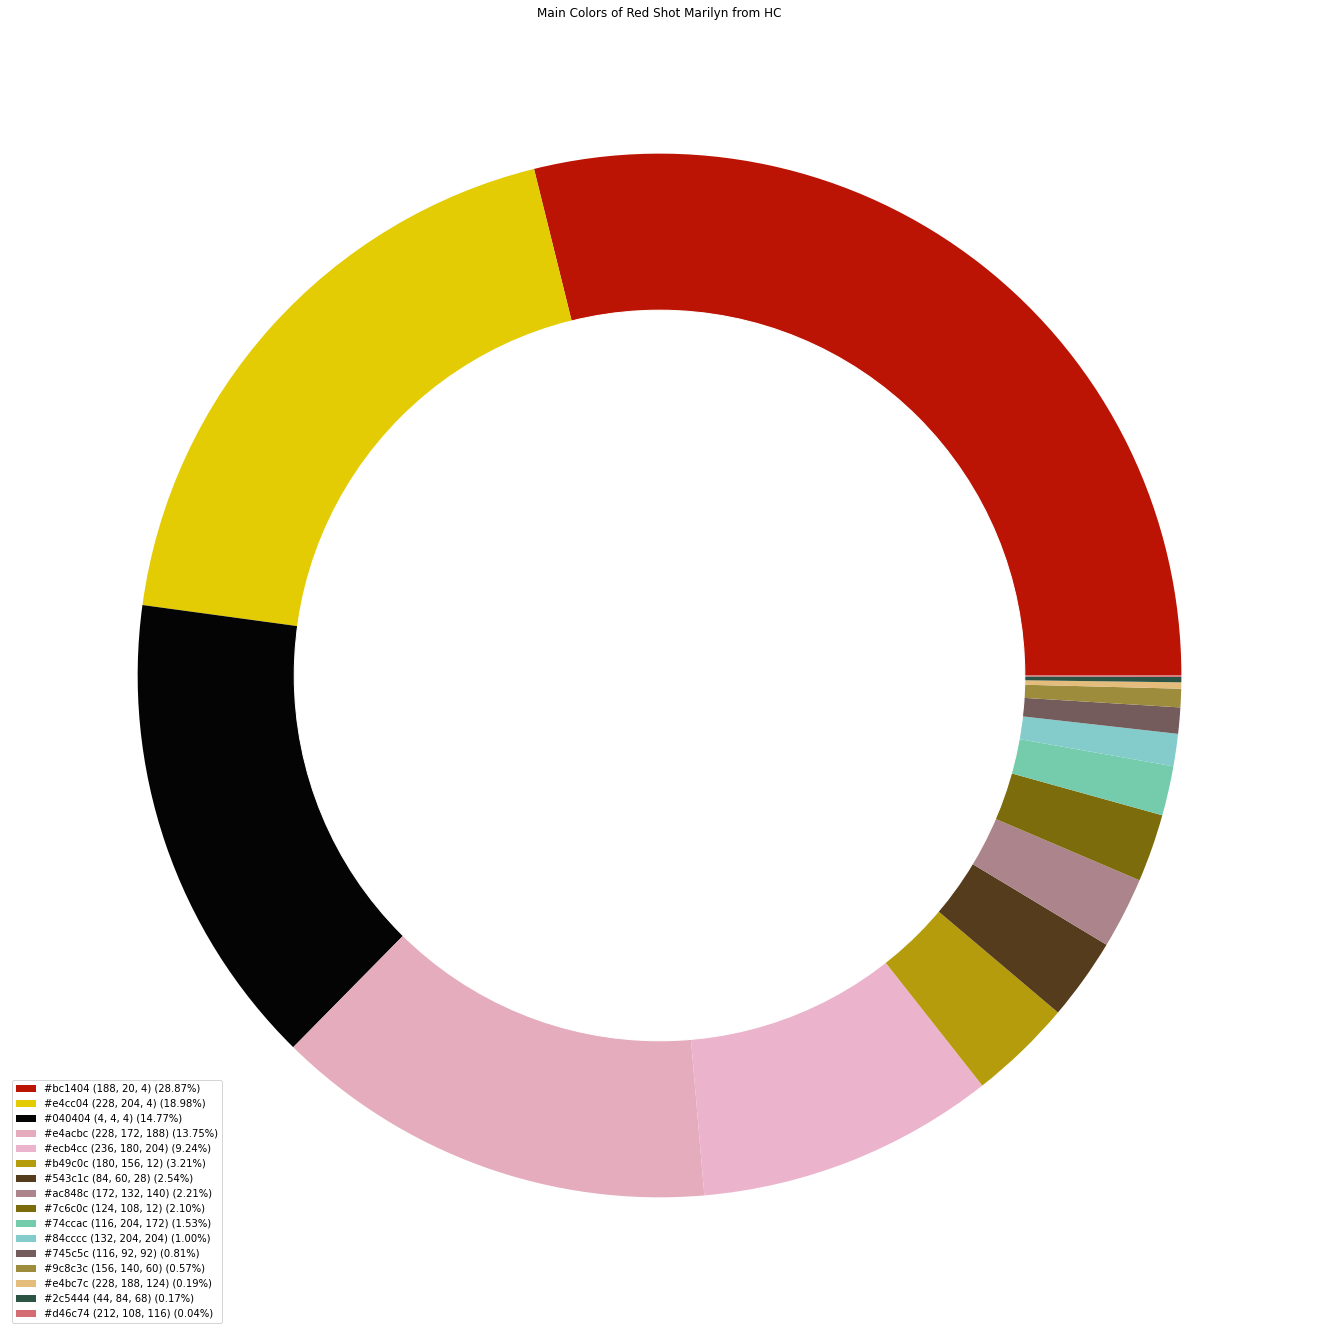

In [24]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Red Shot Marilyn from HC')
plt.show()
fig.savefig('Red_HC_Donut.jpg')

In [25]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('RedS.png',1)))
ax[0][1].imshow(np.asarray(inspect('RedS.png',2)))
ax[0][2].imshow(np.asarray(inspect('RedS.png',3)))
ax[0][3].imshow(np.asarray(inspect('RedS.png',4)))
ax[1][0].imshow(np.asarray(inspect('RedS.png',5)))
ax[1][1].imshow(np.asarray(inspect('RedS.png',6)))
ax[1][2].imshow(np.asarray(inspect('RedS.png',7)))
ax[1][3].imshow(np.asarray(inspect('RedS.png',8)))
ax[2][0].imshow(np.asarray(inspect('RedS.png',9)))
ax[2][1].imshow(np.asarray(inspect('RedS.png',10)))
ax[2][2].imshow(np.asarray(inspect('RedS.png',11)))
ax[2][3].imshow(np.asarray(inspect('RedS.png',12)))
ax[3][0].imshow(np.asarray(inspect('RedS.png',13)))
ax[3][1].imshow(np.asarray(inspect('RedS.png',14)))
ax[3][2].imshow(np.asarray(inspect('RedS.png',15)))
ax[3][3].imshow(np.asarray(inspect('RedS.png',16)))
fig.savefig('Red_HC_Clust.jpg')

TypeError: __init__() got an unexpected keyword argument 'layout'

In [ ]:
df = get_data('RedS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

In [ ]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

In [ ]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Red Shot Marilyn from K-Means')
plt.show()
fig.savefig('Red_KM_Donut.jpg')

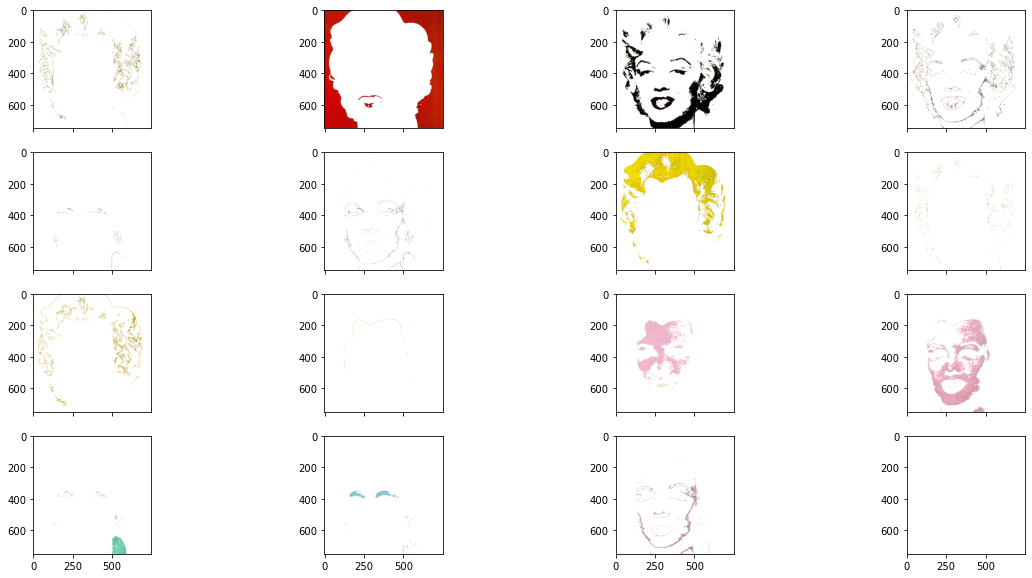

In [27]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('RedS.png',1)))
ax[0][1].imshow(np.asarray(inspect('RedS.png',2)))
ax[0][2].imshow(np.asarray(inspect('RedS.png',3)))
ax[0][3].imshow(np.asarray(inspect('RedS.png',4)))
ax[1][0].imshow(np.asarray(inspect('RedS.png',5)))
ax[1][1].imshow(np.asarray(inspect('RedS.png',6)))
ax[1][2].imshow(np.asarray(inspect('RedS.png',7)))
ax[1][3].imshow(np.asarray(inspect('RedS.png',8)))
ax[2][0].imshow(np.asarray(inspect('RedS.png',9)))
ax[2][1].imshow(np.asarray(inspect('RedS.png',10)))
ax[2][2].imshow(np.asarray(inspect('RedS.png',11)))
ax[2][3].imshow(np.asarray(inspect('RedS.png',12)))
ax[3][0].imshow(np.asarray(inspect('RedS.png',13)))
ax[3][1].imshow(np.asarray(inspect('RedS.png',14)))
ax[3][2].imshow(np.asarray(inspect('RedS.png',15)))
ax[3][3].imshow(np.asarray(inspect('RedS.png',0)))
fig.savefig('Red_KM_Clust.jpg')

In [ ]:
#Blue HC outperforms K-Means #K-Means outperforms HC for Red

In [92]:
df = get_data('GREEN.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [76]:
im = Image.open('GREEN.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('GreenS.png')

In [93]:
df = get_data('GreenS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

In [94]:
df

,R,G,B
0,148,180,172
1,148,188,172
2,156,188,180
6,156,188,172
40,156,196,180
...,...,...,...
516497,180,172,140
516499,188,196,164
520817,188,196,156
522348,124,132,92


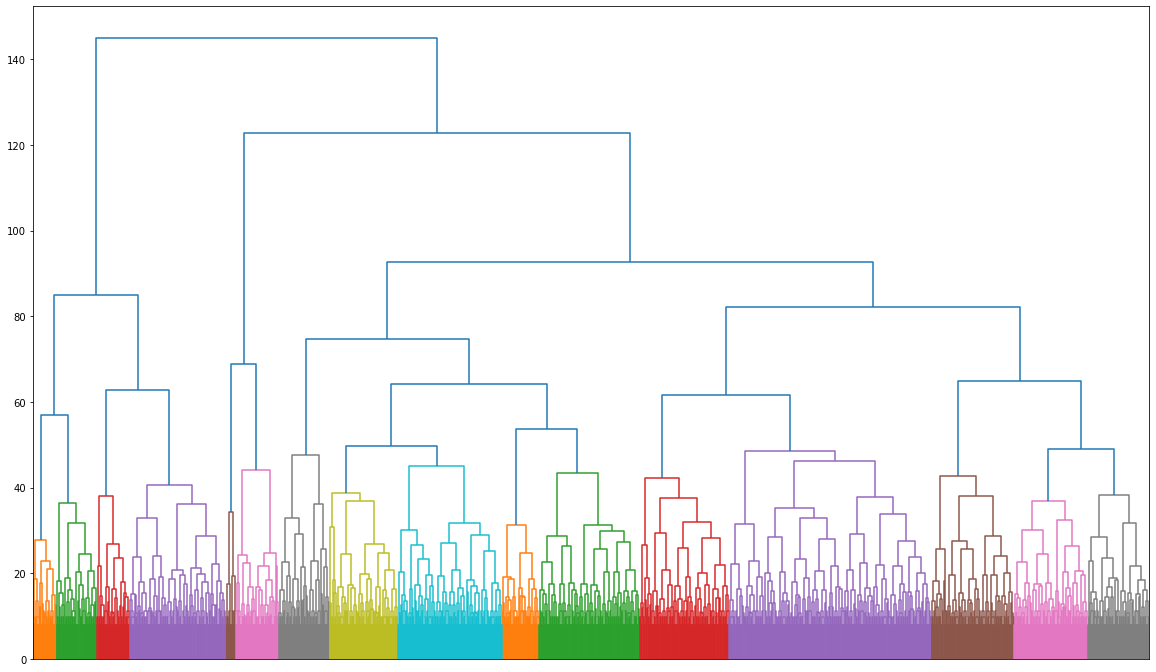

In [95]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 48.5)
plt.show()
fig.savefig('Green_Dendrogram.jpg')

In [96]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('GreenS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [97]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_41289/785831318.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


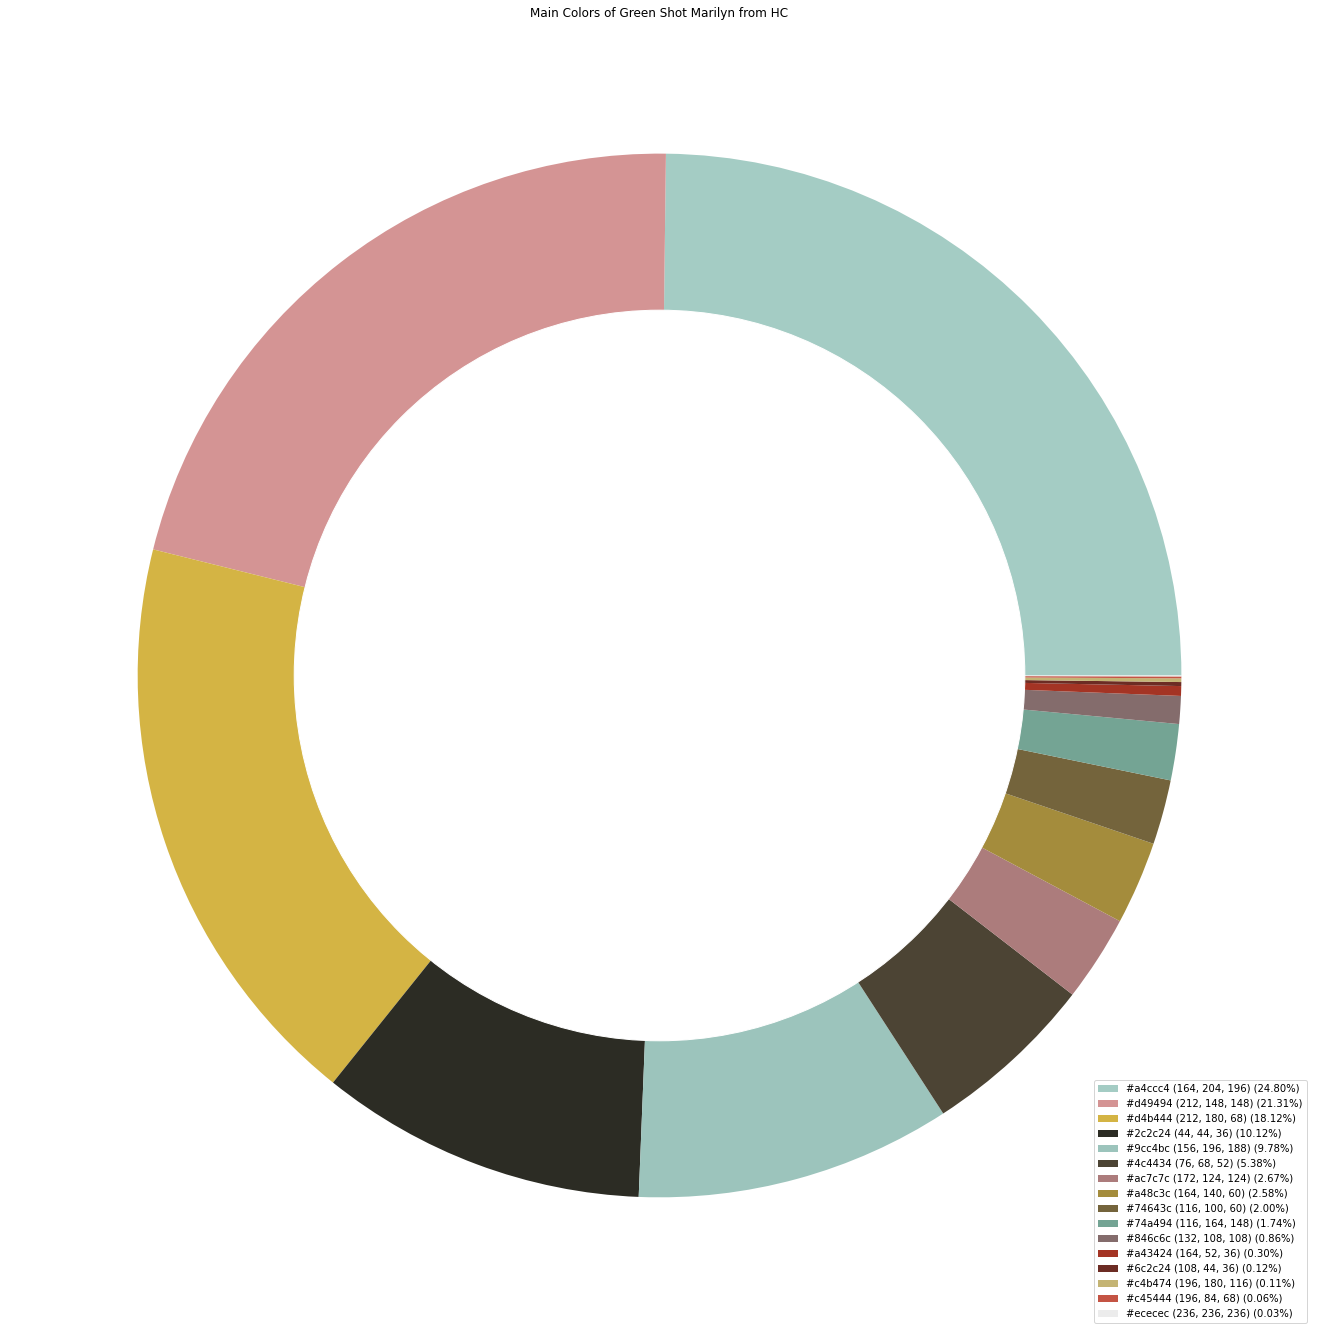

In [98]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Green Shot Marilyn from HC')
plt.show()
fig.savefig('Green_HC_Donut.jpg')

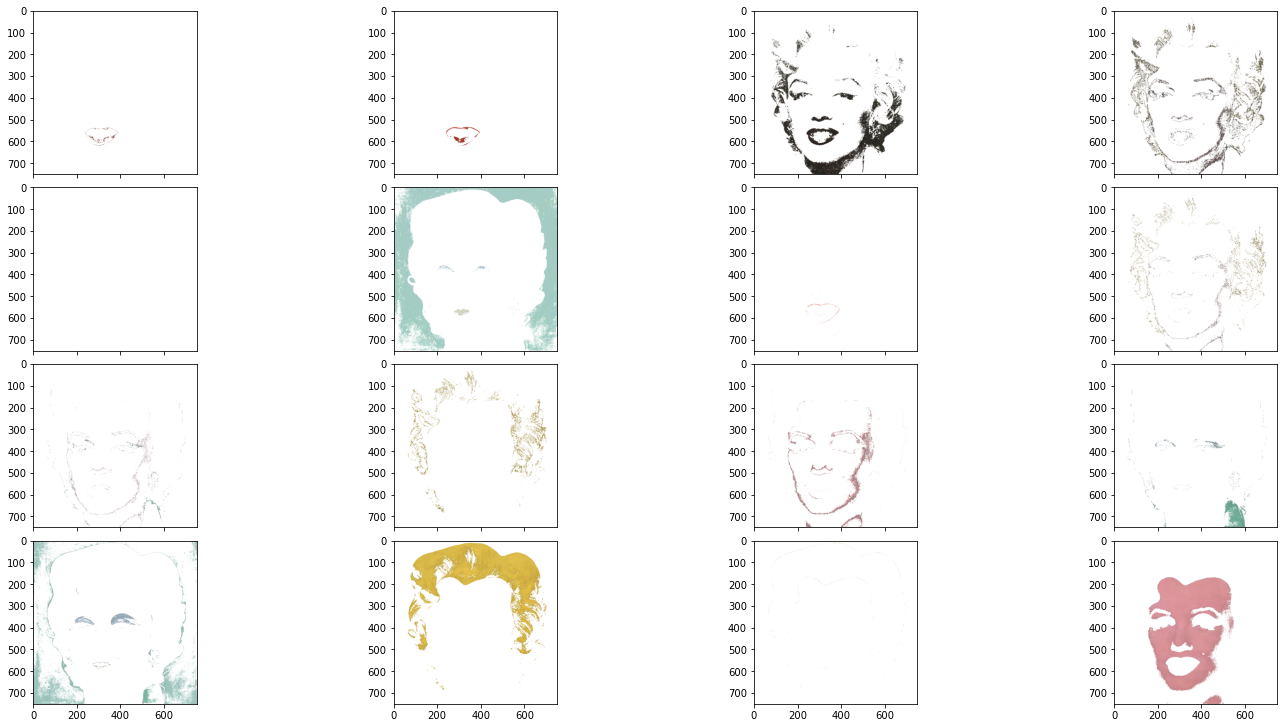

In [99]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('GreenS.png',1)))
ax[0][1].imshow(np.asarray(inspect('GreenS.png',2)))
ax[0][2].imshow(np.asarray(inspect('GreenS.png',3)))
ax[0][3].imshow(np.asarray(inspect('GreenS.png',4)))
ax[1][0].imshow(np.asarray(inspect('GreenS.png',5)))
ax[1][1].imshow(np.asarray(inspect('GreenS.png',6)))
ax[1][2].imshow(np.asarray(inspect('GreenS.png',7)))
ax[1][3].imshow(np.asarray(inspect('GreenS.png',8)))
ax[2][0].imshow(np.asarray(inspect('GreenS.png',9)))
ax[2][1].imshow(np.asarray(inspect('GreenS.png',10)))
ax[2][2].imshow(np.asarray(inspect('GreenS.png',11)))
ax[2][3].imshow(np.asarray(inspect('GreenS.png',12)))
ax[3][0].imshow(np.asarray(inspect('GreenS.png',13)))
ax[3][1].imshow(np.asarray(inspect('GreenS.png',14)))
ax[3][2].imshow(np.asarray(inspect('GreenS.png',15)))
ax[3][3].imshow(np.asarray(inspect('GreenS.png',16)))
fig.savefig('Green_HC_Clust.jpg')

In [108]:
df = get_data('GreenS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#a4ccc4 (164, 204, 196) (21.19%)',
 '#dcb444 (220, 180, 68) (14.94%)',
 '#9cc4bc (156, 196, 188) (12.52%)',
 '#dc949c (220, 148, 156) (9.97%)',
 '#d48c94 (212, 140, 148) (8.89%)',
 '#2c2c24 (44, 44, 36) (7.07%)',
 '#3c342c (60, 52, 44) (5.17%)',
 '#bc9c3c (188, 156, 60) (3.89%)',
 '#bc8484 (188, 132, 132) (3.33%)',
 '#544c3c (84, 76, 60) (2.92%)',
 '#74ac9c (116, 172, 156) (2.56%)',
 '#9c843c (156, 132, 60) (2.07%)',
 '#a4747c (164, 116, 124) (1.99%)',
 '#746434 (116, 100, 52) (1.73%)',
 '#746464 (116, 100, 100) (1.38%)',
 '#a43424 (164, 52, 36) (0.39%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_41289/138118243.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


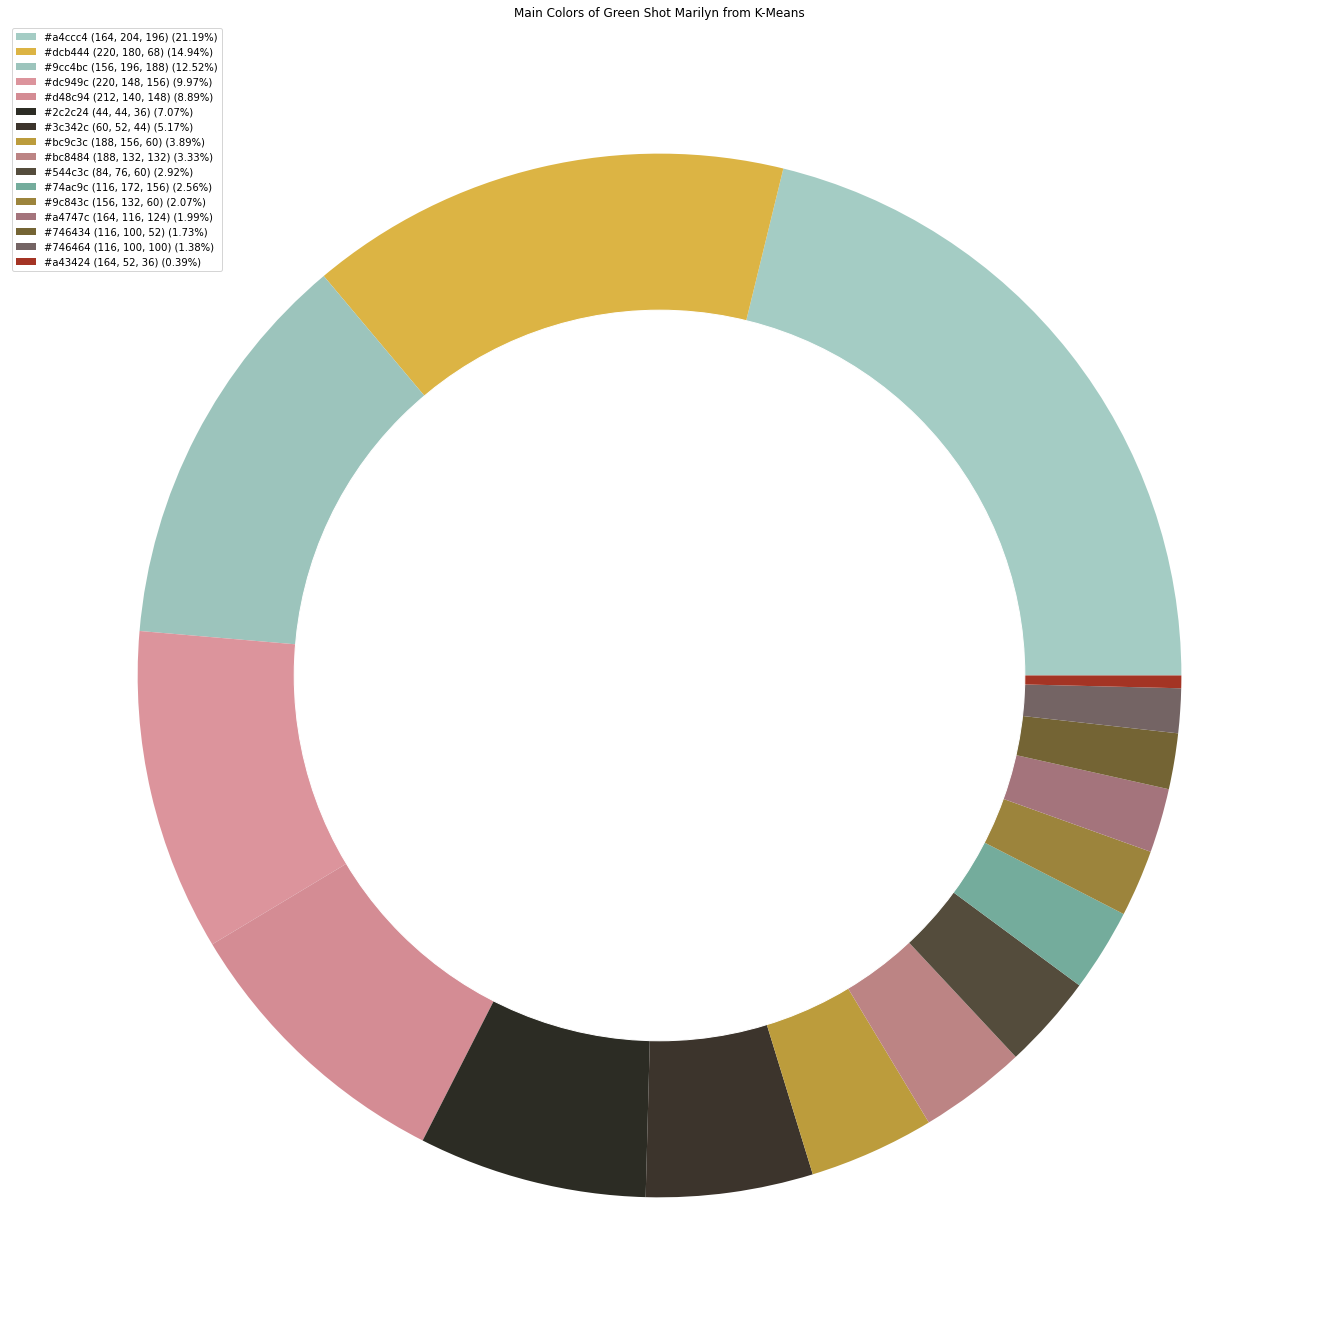

In [110]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Green Shot Marilyn from K-Means')
plt.show()
fig.savefig('Green_KM_Donut.jpg')

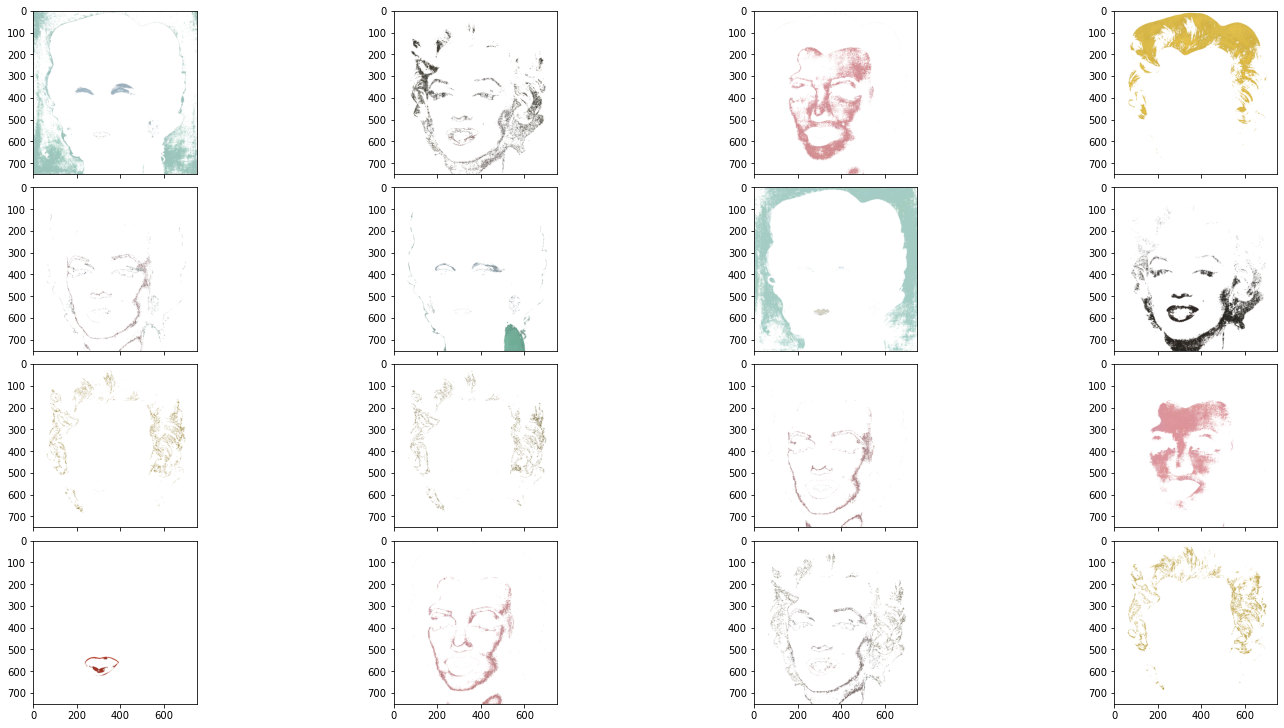

In [111]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('GreenS.png',1)))
ax[0][1].imshow(np.asarray(inspect('GreenS.png',2)))
ax[0][2].imshow(np.asarray(inspect('GreenS.png',3)))
ax[0][3].imshow(np.asarray(inspect('GreenS.png',4)))
ax[1][0].imshow(np.asarray(inspect('GreenS.png',5)))
ax[1][1].imshow(np.asarray(inspect('GreenS.png',6)))
ax[1][2].imshow(np.asarray(inspect('GreenS.png',7)))
ax[1][3].imshow(np.asarray(inspect('GreenS.png',8)))
ax[2][0].imshow(np.asarray(inspect('GreenS.png',9)))
ax[2][1].imshow(np.asarray(inspect('GreenS.png',10)))
ax[2][2].imshow(np.asarray(inspect('GreenS.png',11)))
ax[2][3].imshow(np.asarray(inspect('GreenS.png',12)))
ax[3][0].imshow(np.asarray(inspect('GreenS.png',13)))
ax[3][1].imshow(np.asarray(inspect('GreenS.png',14)))
ax[3][2].imshow(np.asarray(inspect('GreenS.png',15)))
ax[3][3].imshow(np.asarray(inspect('GreenS.png',0)))
fig.savefig('Green_KM_Clust.jpg')

In [112]:
df = get_data('AQUA.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]
im = Image.open('AQUA.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('AquaS.png')

In [4]:
df = get_data('AquaS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

In [5]:
df

,R,G,B
0,100,196,188
1,84,196,188
2,76,188,180
3,76,180,180
4,68,180,188
...,...,...,...
525302,28,172,148
525307,60,172,140
526051,36,180,164
526052,20,172,148


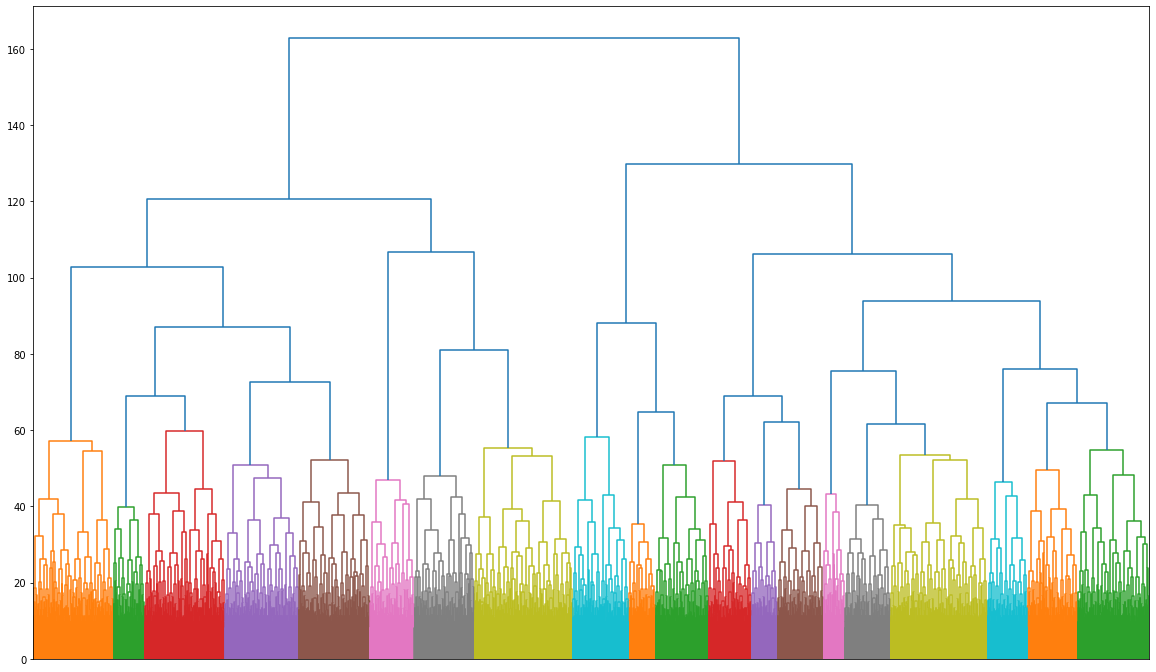

In [12]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 60)
plt.show()
fig.savefig('Aqua_Dendrogram.jpg')

In [7]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 20,criterion = 'maxclust', method = 'average')
dfo = get_data('AquaS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [9]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*20)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/1130556836.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


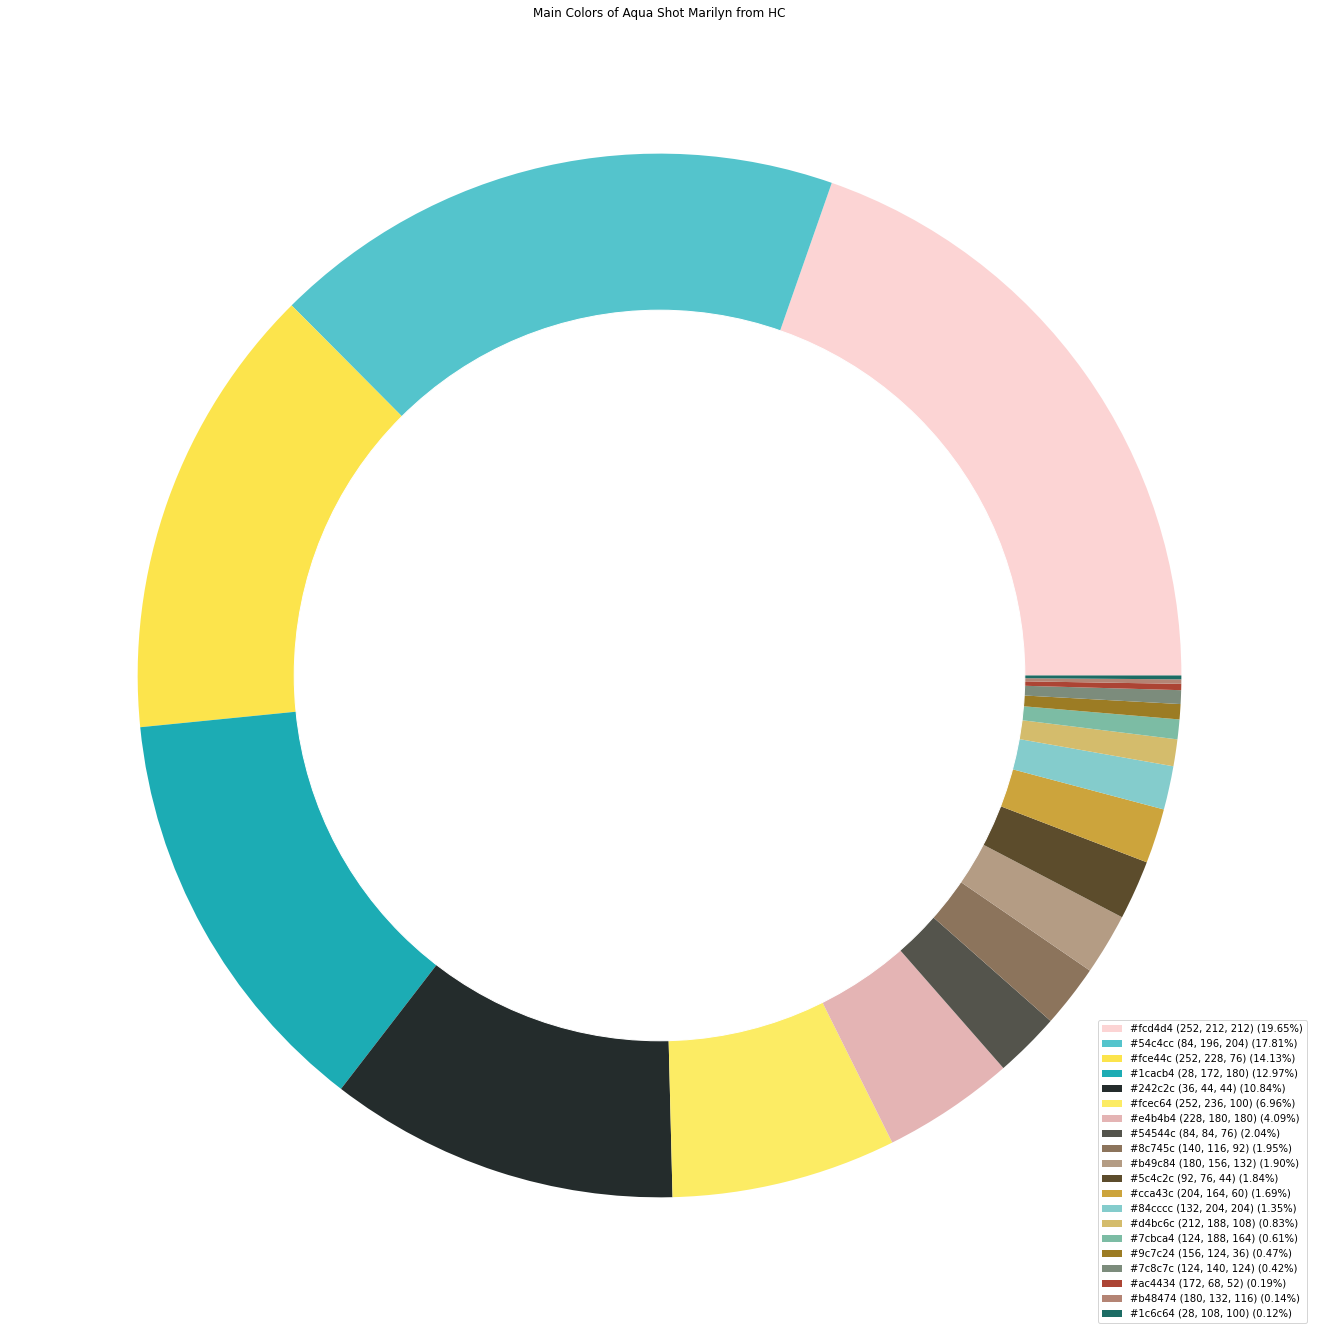

In [10]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Aqua Shot Marilyn from HC')
plt.show()
fig.savefig('Aqua_HC_Donut.jpg')

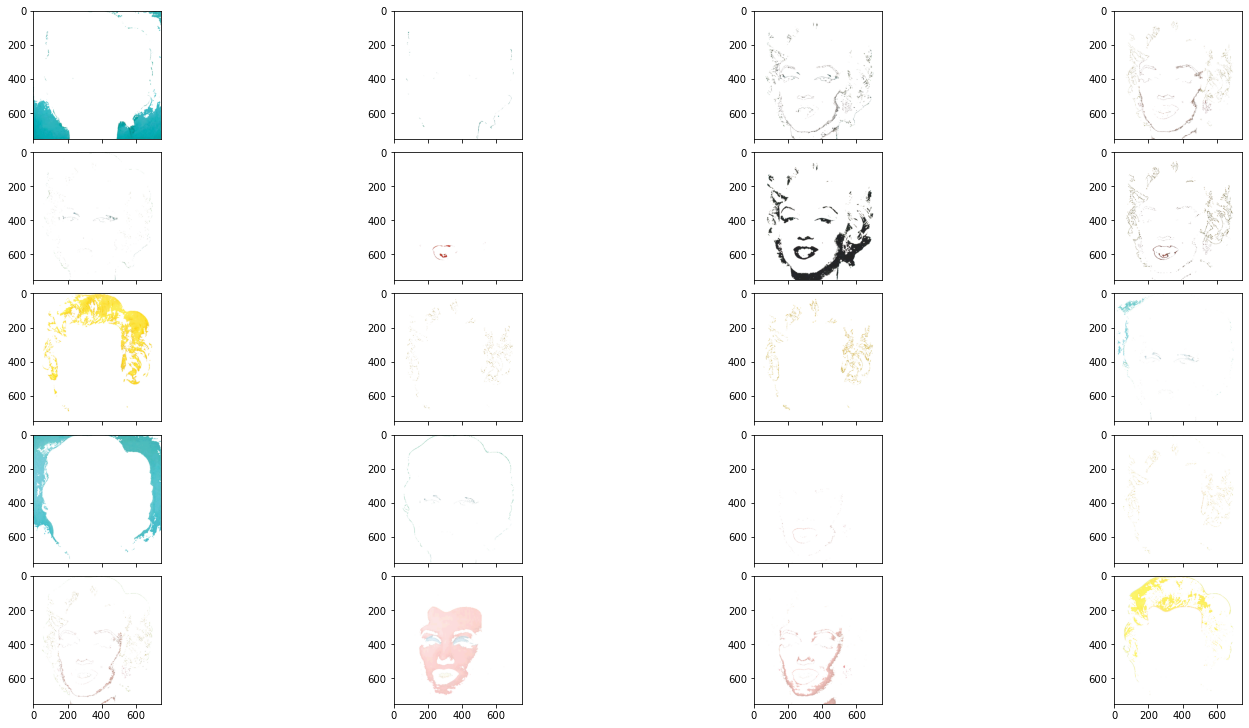

In [11]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('AquaS.png',1)))
ax[0][1].imshow(np.asarray(inspect('AquaS.png',2)))
ax[0][2].imshow(np.asarray(inspect('AquaS.png',3)))
ax[0][3].imshow(np.asarray(inspect('AquaS.png',4)))
ax[1][0].imshow(np.asarray(inspect('AquaS.png',5)))
ax[1][1].imshow(np.asarray(inspect('AquaS.png',6)))
ax[1][2].imshow(np.asarray(inspect('AquaS.png',7)))
ax[1][3].imshow(np.asarray(inspect('AquaS.png',8)))
ax[2][0].imshow(np.asarray(inspect('AquaS.png',9)))
ax[2][1].imshow(np.asarray(inspect('AquaS.png',10)))
ax[2][2].imshow(np.asarray(inspect('AquaS.png',11)))
ax[2][3].imshow(np.asarray(inspect('AquaS.png',12)))
ax[3][0].imshow(np.asarray(inspect('AquaS.png',13)))
ax[3][1].imshow(np.asarray(inspect('AquaS.png',14)))
ax[3][2].imshow(np.asarray(inspect('AquaS.png',15)))
ax[3][3].imshow(np.asarray(inspect('AquaS.png',16)))
ax[4][0].imshow(np.asarray(inspect('AquaS.png',17)))
ax[4][1].imshow(np.asarray(inspect('AquaS.png',18)))
ax[4][2].imshow(np.asarray(inspect('AquaS.png',19)))
ax[4][3].imshow(np.asarray(inspect('AquaS.png',20)))
fig.savefig('Aqua_HC_Clust.jpg')

In [13]:
df = get_data('AquaS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 20)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*20)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#fcd4d4 (252, 212, 212) (10.45%)',
 '#24242c (36, 36, 44) (9.21%)',
 '#fce44c (252, 228, 76) (9.00%)',
 '#44bcbc (68, 188, 188) (8.46%)',
 '#fcec64 (252, 236, 100) (7.68%)',
 '#fcdcdc (252, 220, 220) (6.91%)',
 '#54c4cc (84, 196, 204) (6.41%)',
 '#74ccd4 (116, 204, 212) (6.20%)',
 '#2cb4bc (44, 180, 188) (5.89%)',
 '#04acb4 (4, 172, 180) (5.35%)',
 '#f4c4c4 (244, 196, 196) (4.27%)',
 '#fcdc2c (252, 220, 44) (3.59%)',
 '#443c34 (68, 60, 52) (3.08%)',
 '#dcb4ac (220, 180, 172) (2.89%)',
 '#b49c8c (180, 156, 140) (2.03%)',
 '#5c5c4c (92, 92, 76) (1.99%)',
 '#dcbc4c (220, 188, 76) (1.94%)',
 '#8c7c6c (140, 124, 108) (1.75%)',
 '#b4943c (180, 148, 60) (1.52%)',
 '#84642c (132, 100, 44) (1.36%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/2979833583.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


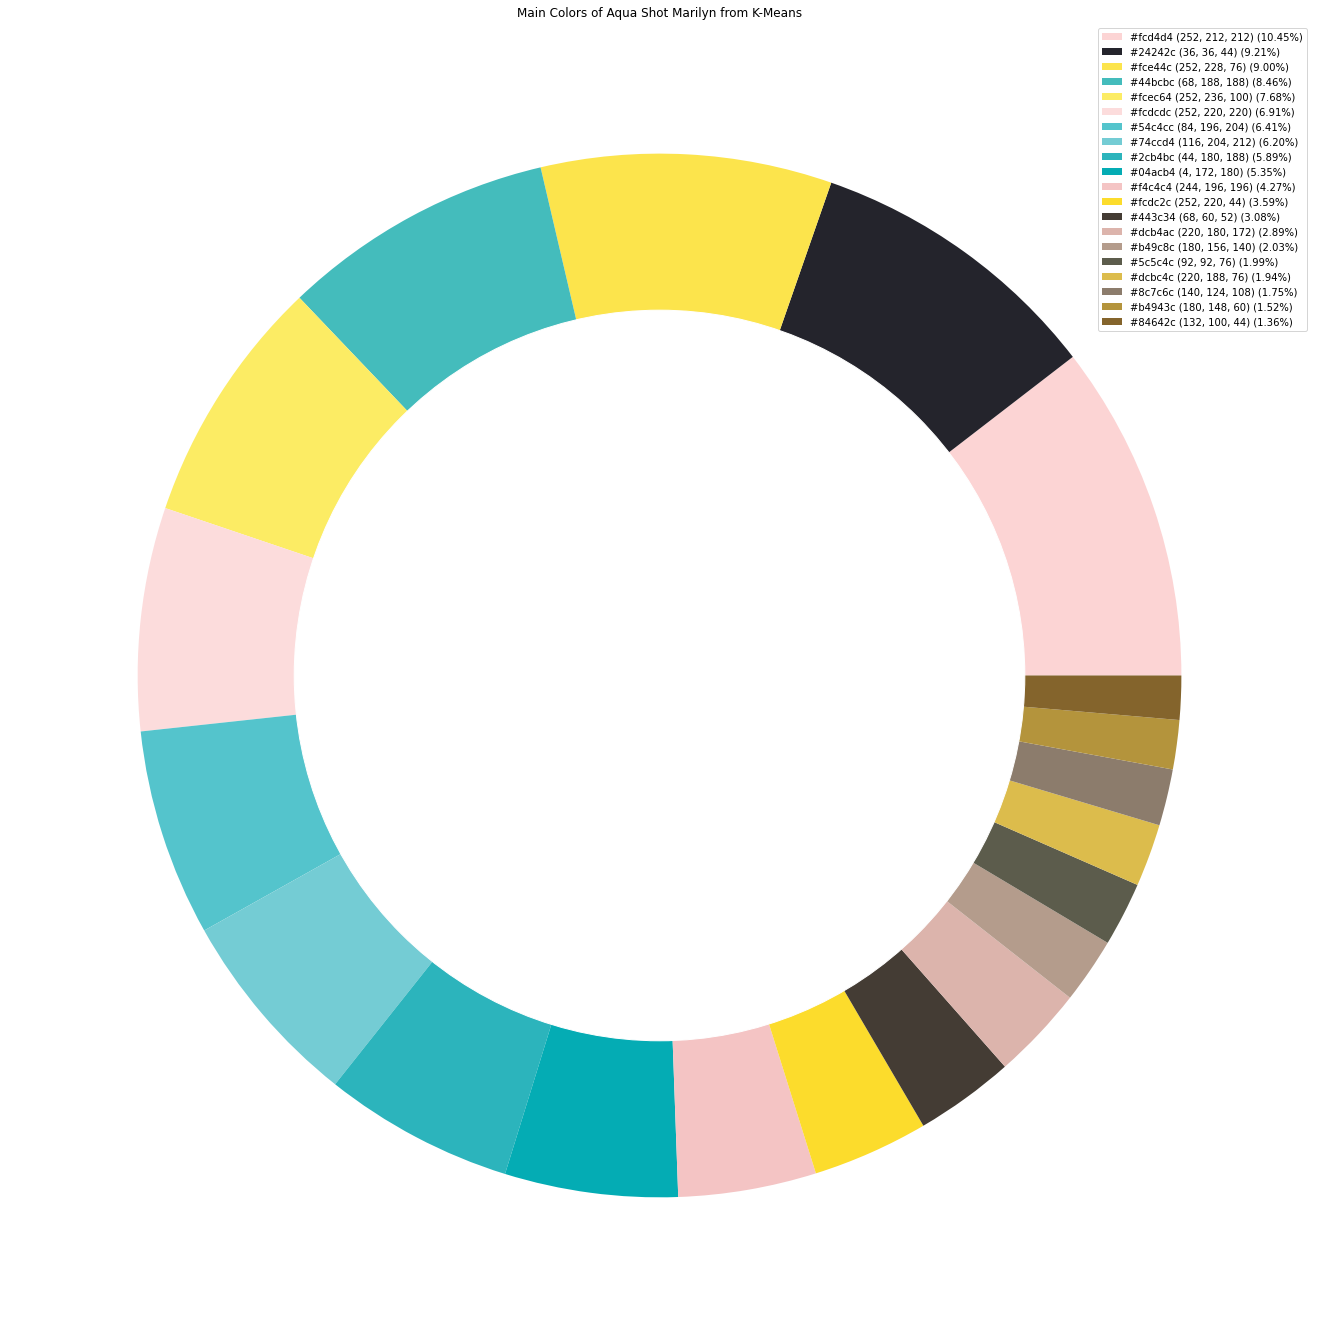

In [15]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Aqua Shot Marilyn from K-Means')
plt.show()
fig.savefig('Aqua_KM_Donut.jpg')

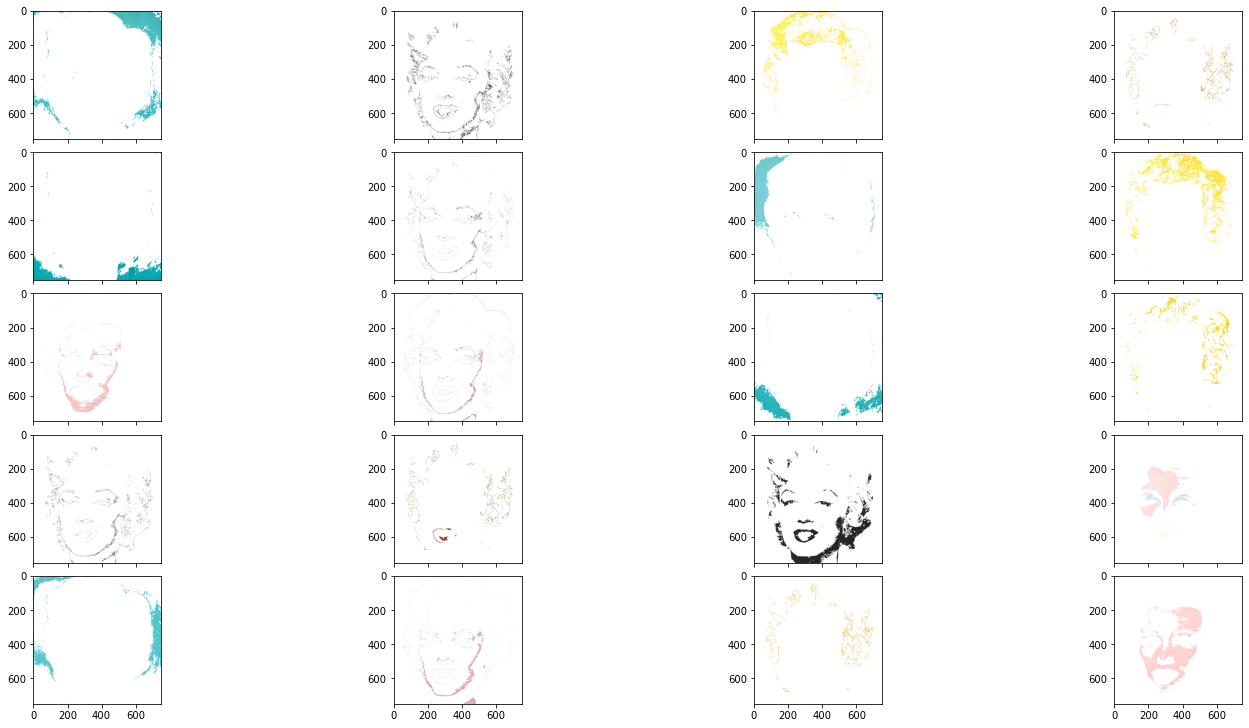

In [16]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('AquaS.png',1)))
ax[0][1].imshow(np.asarray(inspect('AquaS.png',2)))
ax[0][2].imshow(np.asarray(inspect('AquaS.png',3)))
ax[0][3].imshow(np.asarray(inspect('AquaS.png',4)))
ax[1][0].imshow(np.asarray(inspect('AquaS.png',5)))
ax[1][1].imshow(np.asarray(inspect('AquaS.png',6)))
ax[1][2].imshow(np.asarray(inspect('AquaS.png',7)))
ax[1][3].imshow(np.asarray(inspect('AquaS.png',8)))
ax[2][0].imshow(np.asarray(inspect('AquaS.png',9)))
ax[2][1].imshow(np.asarray(inspect('AquaS.png',10)))
ax[2][2].imshow(np.asarray(inspect('AquaS.png',11)))
ax[2][3].imshow(np.asarray(inspect('AquaS.png',12)))
ax[3][0].imshow(np.asarray(inspect('AquaS.png',13)))
ax[3][1].imshow(np.asarray(inspect('AquaS.png',14)))
ax[3][2].imshow(np.asarray(inspect('AquaS.png',15)))
ax[3][3].imshow(np.asarray(inspect('AquaS.png',16)))
ax[4][0].imshow(np.asarray(inspect('AquaS.png',17)))
ax[4][1].imshow(np.asarray(inspect('AquaS.png',18)))
ax[4][2].imshow(np.asarray(inspect('AquaS.png',19)))
ax[4][3].imshow(np.asarray(inspect('AquaS.png',0)))
fig.savefig('Aqua_KM_Clust.jpg')

In [17]:
df = get_data('ORANGE.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]
im = Image.open('ORANGE.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('OrangeS.png')

In [37]:
df = get_data('OrangeS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

In [23]:
df

,R,G,B
0,212,116,108
1,212,108,100
2,220,108,100
3,204,124,100
4,220,116,84
...,...,...,...
557252,228,116,108
560253,252,116,76
561002,236,124,108
561752,204,116,108


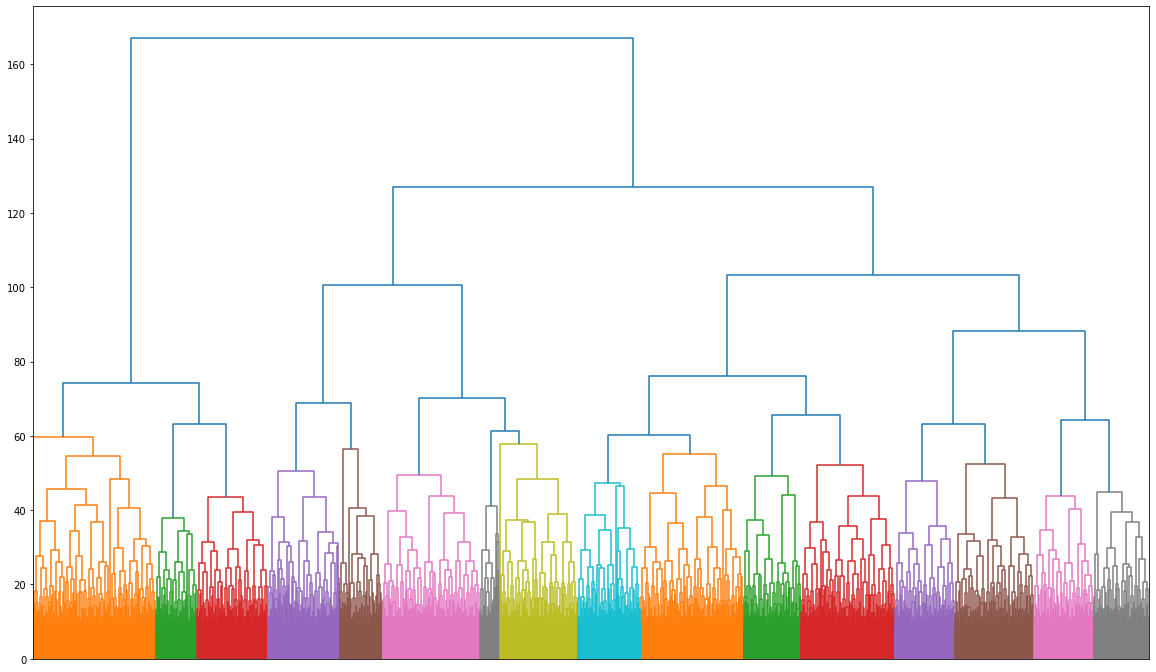

In [38]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 60)
plt.show()
fig.savefig('Orange_Dendrogram.jpg')

In [25]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('OrangeS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [27]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/2111606000.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


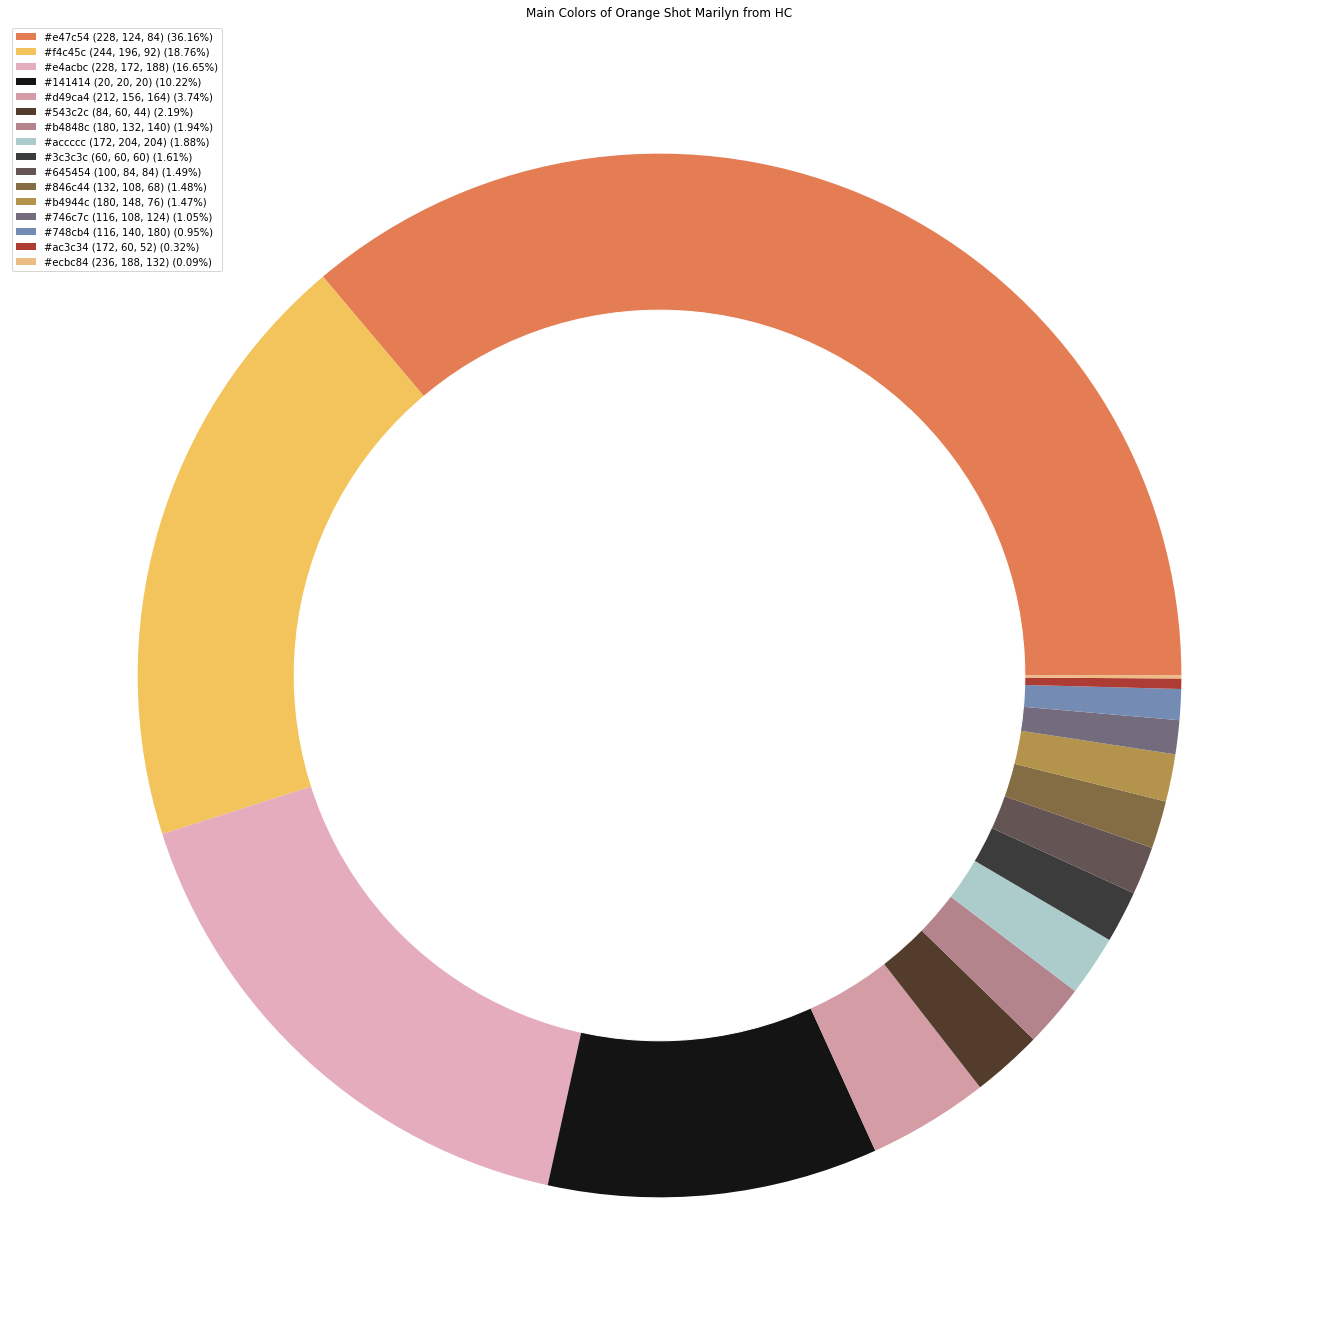

In [29]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Orange Shot Marilyn from HC')
plt.show()
fig.savefig('Orange_HC_Donut.jpg')

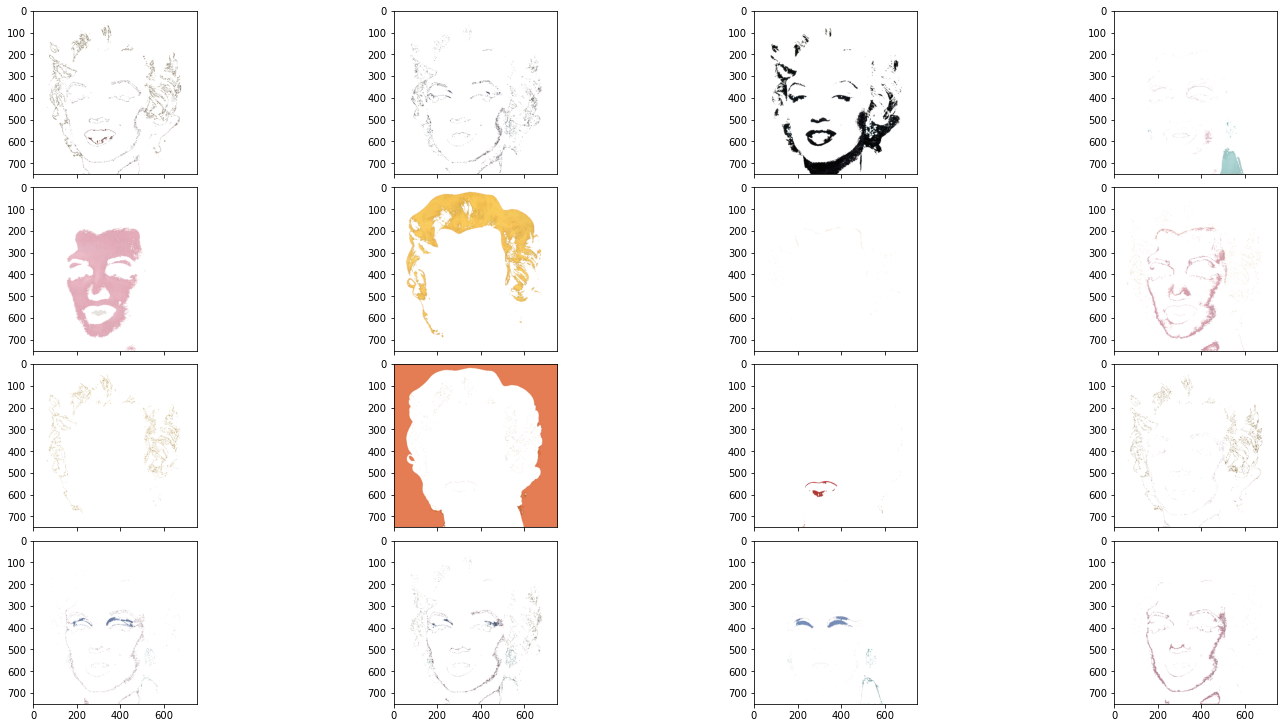

In [31]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('OrangeS.png',1)))
ax[0][1].imshow(np.asarray(inspect('OrangeS.png',2)))
ax[0][2].imshow(np.asarray(inspect('OrangeS.png',3)))
ax[0][3].imshow(np.asarray(inspect('OrangeS.png',4)))
ax[1][0].imshow(np.asarray(inspect('OrangeS.png',5)))
ax[1][1].imshow(np.asarray(inspect('OrangeS.png',6)))
ax[1][2].imshow(np.asarray(inspect('OrangeS.png',7)))
ax[1][3].imshow(np.asarray(inspect('OrangeS.png',8)))
ax[2][0].imshow(np.asarray(inspect('OrangeS.png',9)))
ax[2][1].imshow(np.asarray(inspect('OrangeS.png',10)))
ax[2][2].imshow(np.asarray(inspect('OrangeS.png',11)))
ax[2][3].imshow(np.asarray(inspect('OrangeS.png',12)))
ax[3][0].imshow(np.asarray(inspect('OrangeS.png',13)))
ax[3][1].imshow(np.asarray(inspect('OrangeS.png',14)))
ax[3][2].imshow(np.asarray(inspect('OrangeS.png',15)))
ax[3][3].imshow(np.asarray(inspect('OrangeS.png',16)))
fig.savefig('Orange_HC_Clust.jpg')

In [32]:
df = get_data('OrangeS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/1003140738.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props))


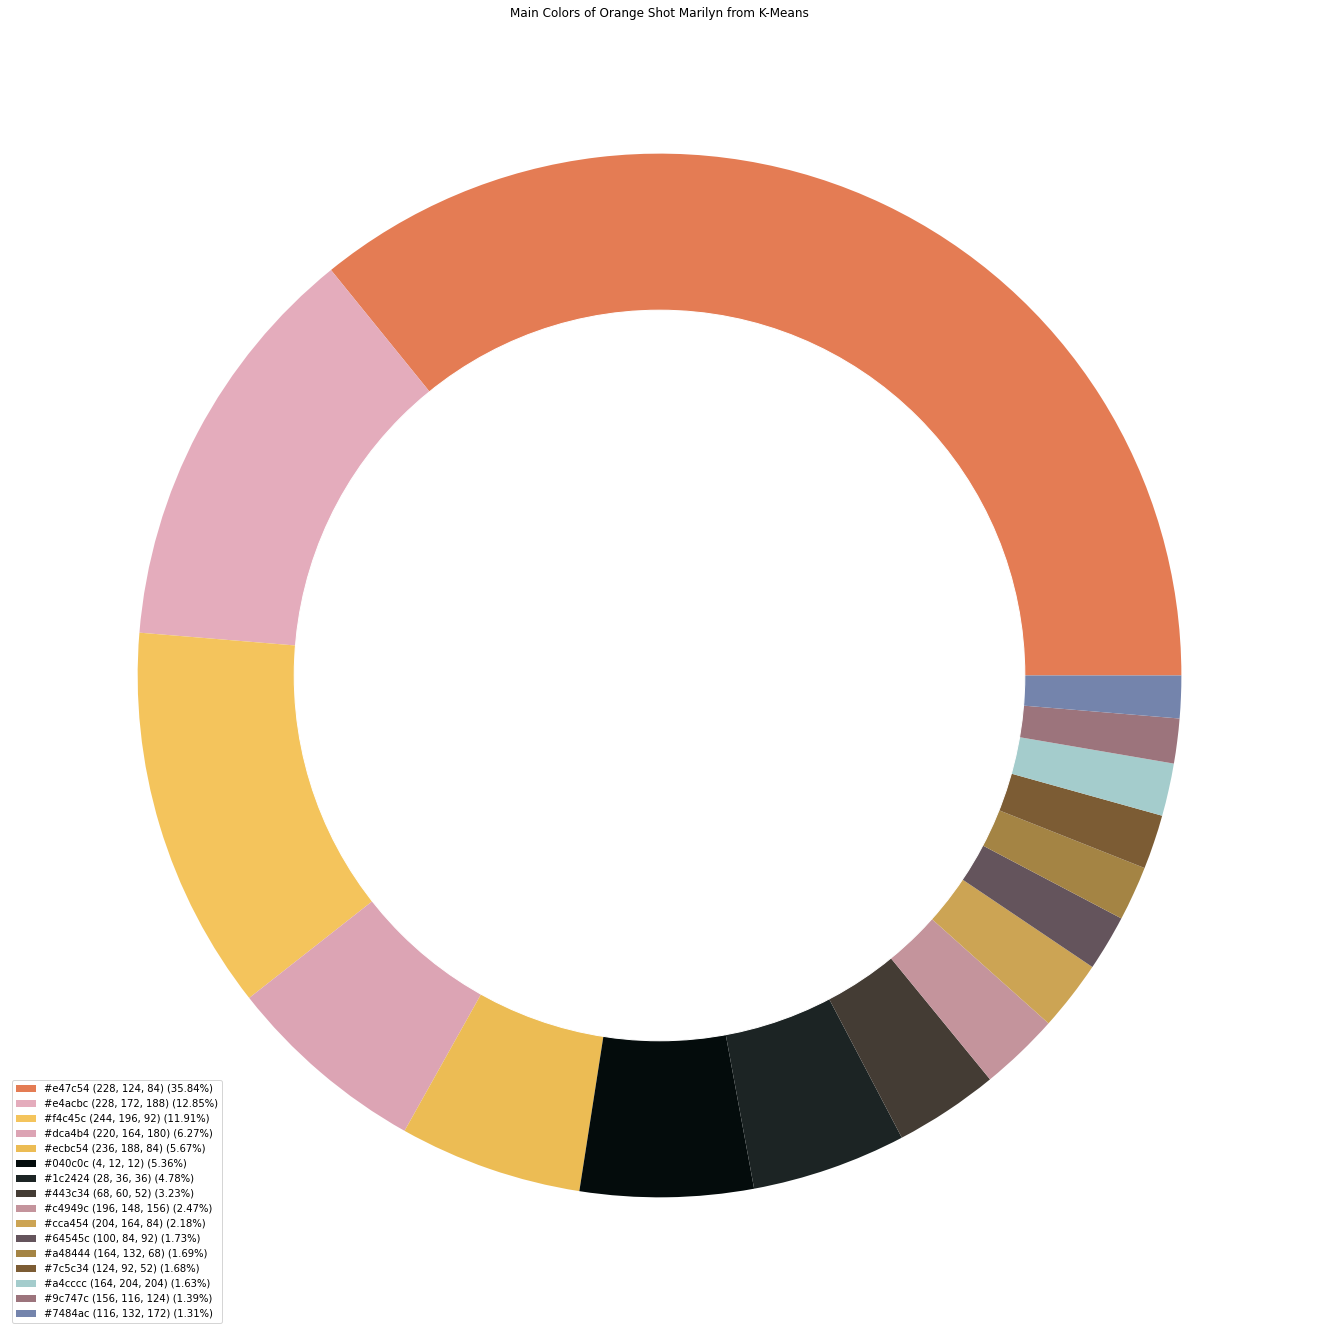

In [35]:
fig = plt.figure(figsize = (40,24))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props))
plt.title('Main Colors of Orange Shot Marilyn from K-Means')
plt.show()
fig.savefig('Orange_KM_Donut.jpg')

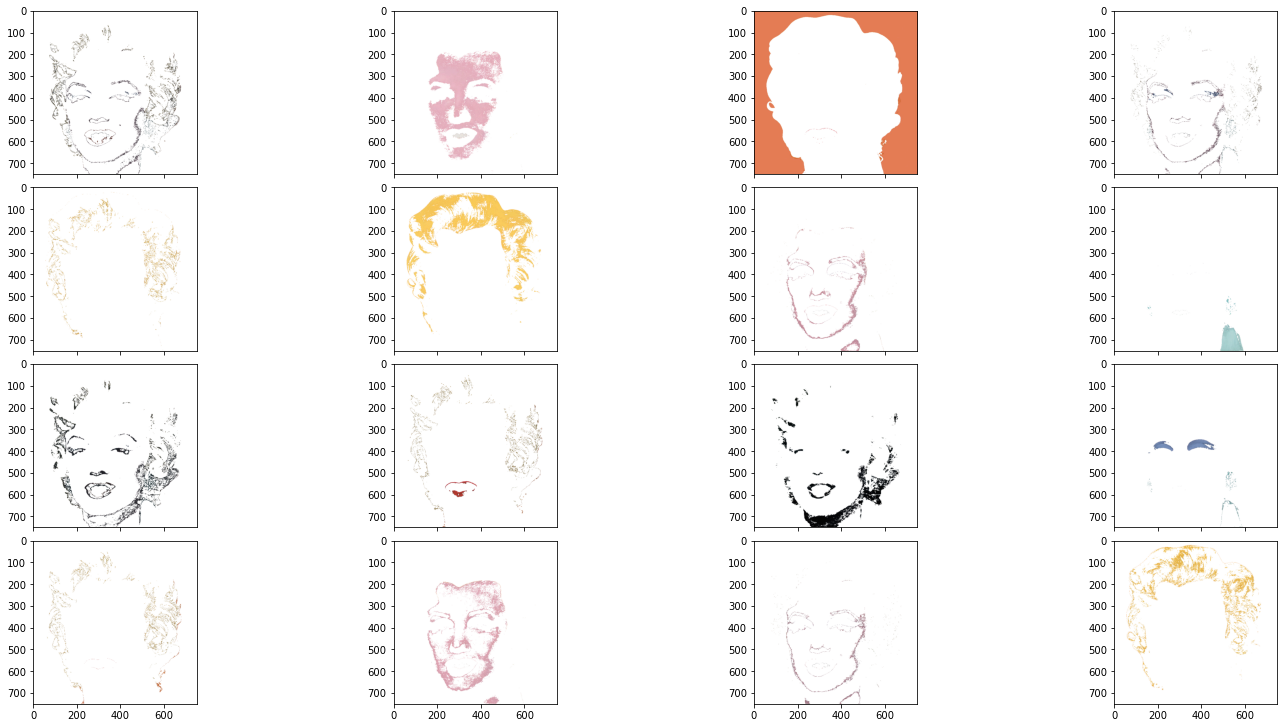

In [36]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('OrangeS.png',1)))
ax[0][1].imshow(np.asarray(inspect('OrangeS.png',2)))
ax[0][2].imshow(np.asarray(inspect('OrangeS.png',3)))
ax[0][3].imshow(np.asarray(inspect('OrangeS.png',4)))
ax[1][0].imshow(np.asarray(inspect('OrangeS.png',5)))
ax[1][1].imshow(np.asarray(inspect('OrangeS.png',6)))
ax[1][2].imshow(np.asarray(inspect('OrangeS.png',7)))
ax[1][3].imshow(np.asarray(inspect('OrangeS.png',8)))
ax[2][0].imshow(np.asarray(inspect('OrangeS.png',9)))
ax[2][1].imshow(np.asarray(inspect('OrangeS.png',10)))
ax[2][2].imshow(np.asarray(inspect('OrangeS.png',11)))
ax[2][3].imshow(np.asarray(inspect('OrangeS.png',12)))
ax[3][0].imshow(np.asarray(inspect('OrangeS.png',13)))
ax[3][1].imshow(np.asarray(inspect('OrangeS.png',14)))
ax[3][2].imshow(np.asarray(inspect('OrangeS.png',15)))
ax[3][3].imshow(np.asarray(inspect('OrangeS.png',0)))
fig.savefig('Orange_KM_Clust.jpg')